In [1]:
from LIBRERIAS import *

In [2]:
data= pd.read_csv("archivo_csv/BIOMECHANICAL_column_2C_weka.csv")

data_prueba= pd.read_csv("archivo_csv/BIOMECHANICAL_column_3C_weka.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
data_NON_class= data.drop(["class"], axis=1)

In [6]:
data_NON_class.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [7]:
data_NON_class.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


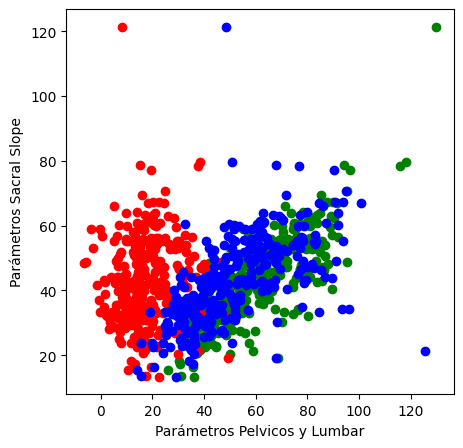

In [33]:
plt.figure(figsize=[5,5])

plt.scatter(x=data["pelvic_incidence"],y=data["sacral_slope"], color= "green")
plt.scatter(x=data["pelvic_tilt numeric"], y= data["sacral_slope"], color= "red")
plt.scatter(x=data["lumbar_lordosis_angle"], y= data["sacral_slope"], color= "blue")

plt.xlabel("Parámetros Pelvicos y Lumbar")
plt.ylabel("Parámetros Sacral Slope")

plt.show()

# Regresión Lineal Simple

In [8]:
pelvic_incidence= np.array(data["pelvic_incidence"]).reshape((-1,1))

sacral_slope= np.array(data["sacral_slope"])

degree_spondylolisthesis= np.array(data["degree_spondylolisthesis"])

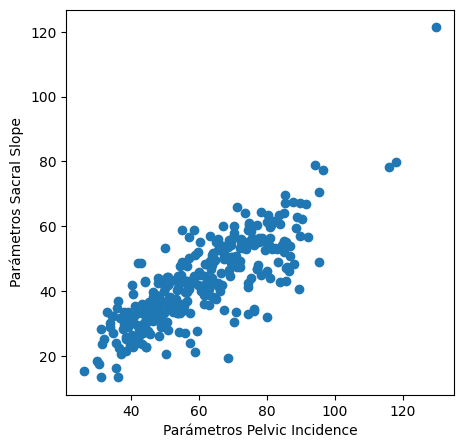

In [9]:
#Visualización de los Datos

plt.figure(figsize=[5,5])

plt.scatter(x=pelvic_incidence,y=sacral_slope)

plt.xlabel("Parámetros Pelvic Incidence")
plt.ylabel("Parámetros Sacral Slope")

plt.show()

In [10]:
#  Algoritmo Regresion Lineal Simple

modelo_regresion_lineal= LinearRegression().fit(pelvic_incidence, sacral_slope)

r_sq= modelo_regresion_lineal.score( pelvic_incidence, sacral_slope)

intercepcion_recta= modelo_regresion_lineal.intercept_

pendiente_recta= modelo_regresion_lineal.coef_

print(f"Coeficiente de Correlacion:{r_sq}")

print (f"Ecuación de la Recta:\nY= {pendiente_recta}X + {intercepcion_recta}")


Coeficiente de Correlacion:0.664159783972475
Ecuación de la Recta:
Y= [0.63465775]X + 4.55916136615285


In [11]:
pelvic_incidence_prueba= np.array(data_prueba["pelvic_incidence"]).reshape((-1, 1))

sacral_slope_prediccion= modelo_regresion_lineal.predict(pelvic_incidence_prueba)

R_Cuadrada:
0.664159783972475


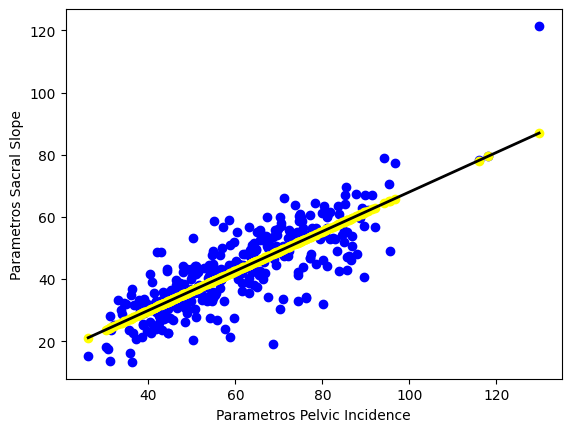

In [12]:
# Generar Recta 
predict_space= np.linspace(min(pelvic_incidence),max(pelvic_incidence)).reshape((-1,1))
predicted= modelo_regresion_lineal.predict(predict_space)

#Plot Regression Line and Scatter
plt.plot(predict_space, predicted, color="black", linewidth=2)

plt.scatter(x=pelvic_incidence, y=sacral_slope, color="blue")
plt.scatter(x=pelvic_incidence_prueba, y=sacral_slope_prediccion, color= "yellow")

plt.xlabel("Parametros Pelvic Incidence")

plt.ylabel("Parametros Sacral Slope")

plt.show
print (f"R_Cuadrada:\n{modelo_regresion_lineal .score(pelvic_incidence,sacral_slope)}")

# Multiple Regresión Lineal

In [13]:
df1= list(data["pelvic_incidence"])

df2= list(data["pelvic_tilt numeric"])


In [14]:
i= 0
pelvic_datos=[]

while i< len(df1):
    pelvic1= df1[i]
    pelvic2= df2[i]
    i+=1
    comb_pelvic= [pelvic1, pelvic2]
    
    pelvic_datos.append(comb_pelvic)
    
    información_pelvic= np.array(pelvic_datos)
    

Text(0, 0.5, 'Parametros Sacral Slope')

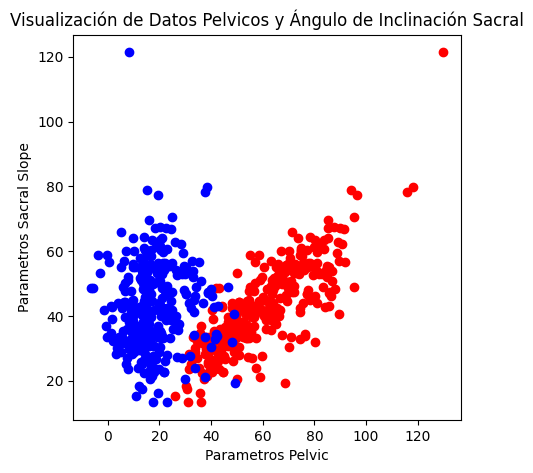

In [15]:
pelvic_tilt_numeric= np.array(data["pelvic_tilt numeric"]).reshape((-1, 1))

#Visualizacion de Datos

plt.figure(figsize=[5,5])

plt.scatter(x=pelvic_incidence,y=sacral_slope, color="red")
plt.scatter(x=pelvic_tilt_numeric, y=sacral_slope, color="blue")

plt.title("Visualización de Datos Pelvicos y Ángulo de Inclinación Sacral")
plt.xlabel("Parametros Pelvic")
plt.ylabel("Parametros Sacral Slope")


In [16]:
# Algoritmo Multiple Regresion Lineal.

modelo_regresionL_multiple= LinearRegression().fit(información_pelvic,sacral_slope)

r_sq_RLM= modelo_regresionL_multiple.score(información_pelvic, sacral_slope)

intercepcion_recta_RLM= modelo_regresionL_multiple.intercept_

pendiente_recta_RLM= modelo_regresionL_multiple.coef_

print(f"Coeficiente de Correlacion:{r_sq_RLM}")
print ("Ecuación de Prediccion: Sacral Slope= [Pelvic_Incidence]-[Pelvic_Tilt]*(Pendiente_recta_RLM)+ (intecepción recta RLM)")
print (f"Ecuación de la Recta:\nY= {pendiente_recta_RLM}X + {intercepcion_recta_RLM}")

Coeficiente de Correlacion:1.0
Ecuación de Prediccion: Sacral Slope= [Pelvic_Incidence]-[Pelvic_Tilt]*(Pendiente_recta_RLM)+ (intecepción recta RLM)
Ecuación de la Recta:
Y= [ 1. -1.]X + -7.766445264678623e-10


In [17]:
# Generar Nuevos Datos 
df1_prueba= list(data_prueba["pelvic_incidence"])
df2_prueba= list(data_prueba["pelvic_tilt"])

In [18]:
i= 0
pelvic_datos_prueba=[]

while i< len(df1):
    pelvic1_prueba= df1_prueba[i]
    pelvic2_prueba= df2_prueba[i]
    i+=1
    comb_pelvic_prueba= [pelvic1_prueba, pelvic2_prueba]
    
    pelvic_datos_prueba.append(comb_pelvic_prueba)
    
    información_pelvic_prueba= np.array(pelvic_datos_prueba)

In [19]:
SacralSLOPE_pred_RLM= modelo_regresionL_multiple.predict(información_pelvic_prueba)

Text(0, 0.5, 'Parametros Sacral Slope')

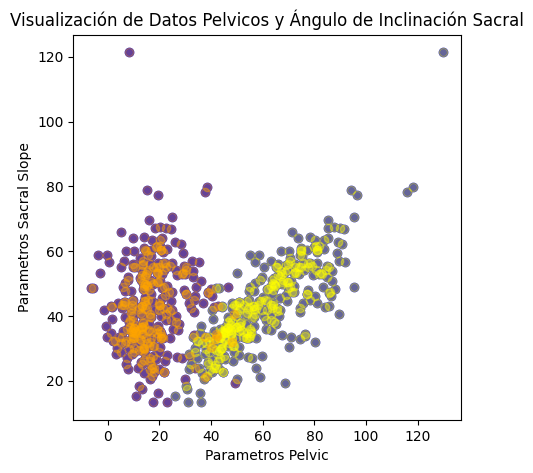

In [20]:
z= modelo_regresionL_multiple.intercept_+modelo_regresionL_multiple.coef_[0]*pelvic_incidence+ modelo_regresionL_multiple.coef_[1]*pelvic_tilt_numeric

#Visualizacion de Datos

fig=plt.figure(figsize=[5,5])
ax= fig.subplots()

ax.scatter(x=pelvic_incidence,y=sacral_slope, color="blue", alpha= 1)
ax.scatter(x=pelvic_tilt_numeric, y=sacral_slope, color="blue", alpha=1)

ax.scatter(x= df1_prueba, y= SacralSLOPE_pred_RLM, color= "Yellow", alpha=0.4)
ax.scatter(x= df2_prueba, y= SacralSLOPE_pred_RLM, color= "Orange", alpha= 0.4)

plt.title("Visualización de Datos Pelvicos y Ángulo de Inclinación Sacral")
plt.xlabel("Parametros Pelvic")
plt.ylabel("Parametros Sacral Slope")


C:\Users\saber\AppData\Local\Temp\ipykernel_1008\2566961677.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


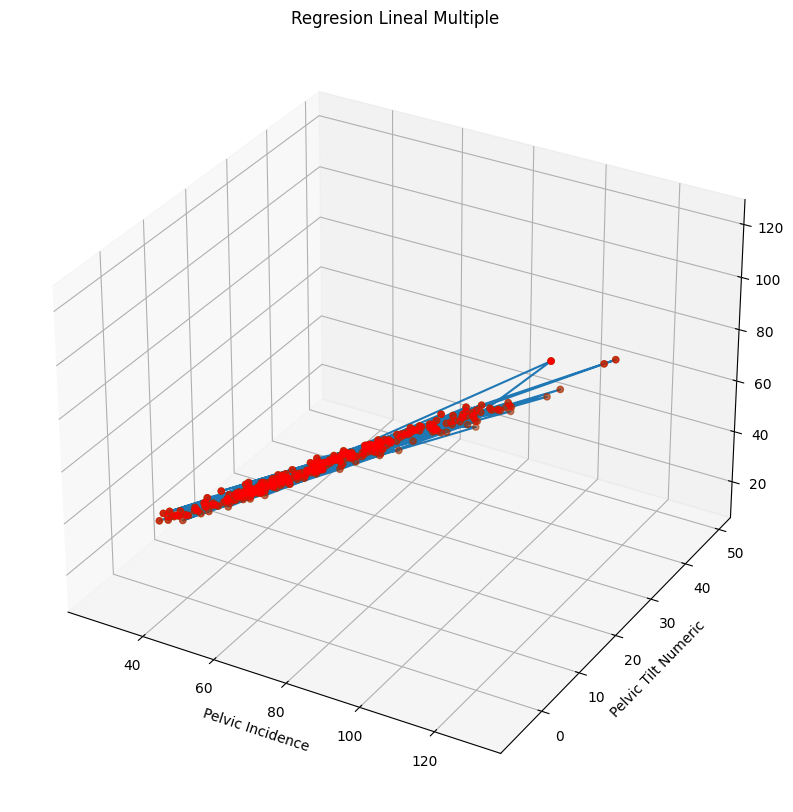

In [21]:
fig= plt.figure(figsize=(10,10))

ax= fig.add_subplot(projection="3d")

ax.scatter(pelvic_incidence, pelvic_tilt_numeric, sacral_slope, color= "red")

ax.scatter(df1_prueba, df2_prueba, SacralSLOPE_pred_RLM, color="green")

ax.plot(pelvic_incidence, pelvic_tilt_numeric, z)

plt.title("Regresion Lineal Multiple")
plt.xlabel("Pelvic Incidence")
plt.ylabel("Pelvic Tilt Numeric")


fig.show()

# Regresión Polinomial

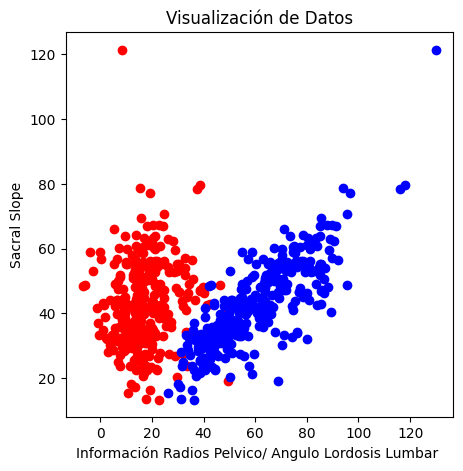

In [22]:
#Visualiacion datos Regresión Polinomial

plt.figure(figsize=[5,5])


plt.scatter(x=información_pelvic[:, 1],y=sacral_slope, color="red")
plt.scatter(x= información_pelvic[:, 0], y=sacral_slope, color="blue")

plt.title("Visualización de Datos")
plt.xlabel("Información Radios Pelvico/ Angulo Lordosis Lumbar ")
plt.ylabel("Sacral Slope")

plt.show()

In [23]:
# Algoritmo Regresion Lineal Polinomial

X_polinomial= PolynomialFeatures(degree=1, include_bias=False).fit_transform(información_pelvic) # El grado puede cambiar los valores de X_polinomial

#transformer.fit(información_Otro_padecimiento)

#X_polinomial= transformer.transform(información_Otro_padecimiento)

modelo_RLPolinomial= LinearRegression().fit(X_polinomial, sacral_slope)

# Datos de la Regresión

r_sq_RLPolinomial= modelo_RLPolinomial.score(X_polinomial, sacral_slope)
Intercepcion_RLPolinomial= modelo_RLPolinomial.intercept_
pendiente_RLPolinomial= modelo_RLPolinomial.coef_

print (f"Coeficiente de Correlación:{r_sq_RLPolinomial}")
print (f"Ecuación de la Recta: Y= X{pendiente_recta_RLM}+ {Intercepcion_RLPolinomial}")

Coeficiente de Correlación:1.0
Ecuación de la Recta: Y= X[ 1. -1.]+ -7.766445264678623e-10


In [24]:
prediccion_Sacral_Slope= modelo_RLPolinomial.predict(información_pelvic_prueba)

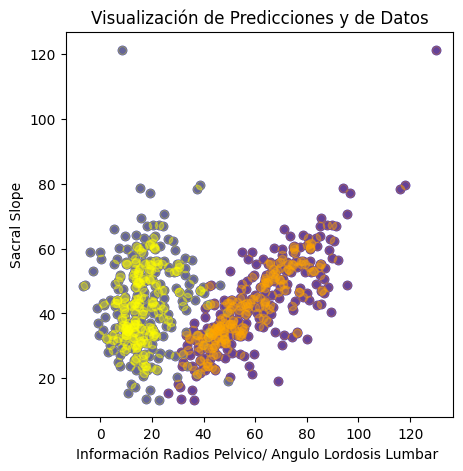

In [25]:
#Visualizacion de Resultados 

plt.figure(figsize=[5,5])


plt.scatter(x=información_pelvic[:,1],y=sacral_slope, color="blue", alpha= 1.0)
plt.scatter(x= información_pelvic[:,0], y=sacral_slope, color="blue", alpha= 1.0)

plt.scatter(x= información_pelvic_prueba[:,1], y=prediccion_Sacral_Slope, color= "yellow", alpha= 0.4)
plt.scatter(x= información_pelvic_prueba[:,0], y=prediccion_Sacral_Slope, color= "orange", alpha= 0.4)

plt.title("Visualización de Predicciones y de Datos")
plt.xlabel("Información Radios Pelvico/ Angulo Lordosis Lumbar ")
plt.ylabel("Sacral Slope")

plt.show()

# Regresion Lineal Avanzado

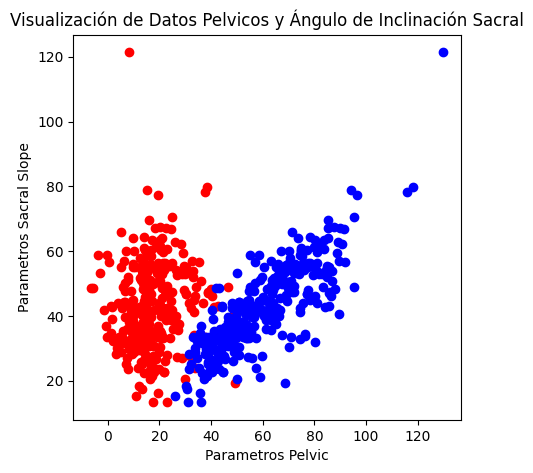

In [26]:
#Visualizacion de Datos

plt.figure(figsize=[5,5])


plt.scatter(x=información_pelvic[:,1],y=sacral_slope, color="red")
plt.scatter(x= información_pelvic[:, 0], y=sacral_slope, color="blue")

plt.title("Visualización de Datos Pelvicos y Ángulo de Inclinación Sacral")
plt.xlabel("Parametros Pelvic")
plt.ylabel("Parametros Sacral Slope")

plt.show()

In [27]:
# Algortimo de Regresión Líneal Avanzada empleando la Información Pelvica para la Predicción de Sacral Slope.

x_constante= sm.add_constant(información_pelvic)

modelo_regresion_lineal_avanzado= sm.OLS(sacral_slope, x_constante)

prediccion_RLA= modelo_regresion_lineal_avanzado.fit()

print (prediccion_RLA.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.274e+21
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        08:33:43   Log-Likelihood:                 5507.8
No. Observations:                 310   AIC:                        -1.101e+04
Df Residuals:                     307   BIC:                        -1.100e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.766e-10   9.83e-10     -0.790      0.4

In [28]:
# Predicción de Sacral Slope empleando el Model de regresión Lineal Avanzado con los Datos de Pelvicos

información_pelvic_prueba_constante= sm.add_constant(información_pelvic_prueba)

Sacral_Slope_prediccion_RLA_DPelvicos= prediccion_RLA.predict(información_pelvic_prueba_constante)

Text(0, 0.5, 'Parámetros Sacral Slope')

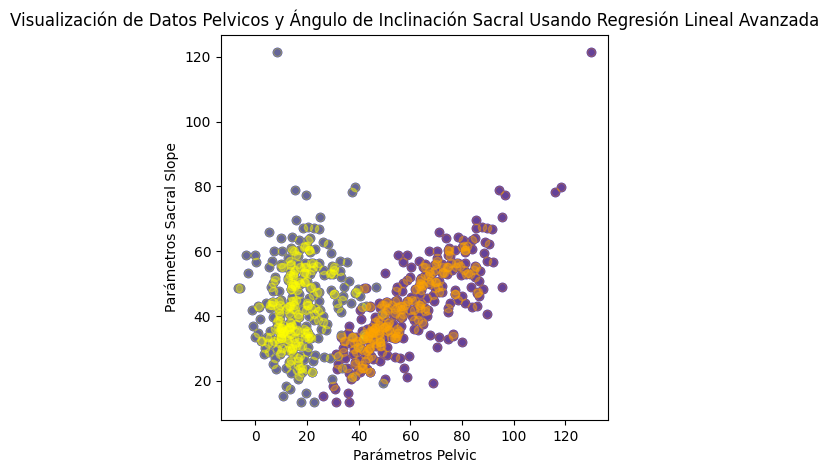

In [29]:

#Visualizacion de Datos

fig=plt.figure(figsize=[5,5])
ax= fig.subplots()

ax.scatter(x=información_pelvic[:,1],y=sacral_slope, color="blue", alpha= 1)
ax.scatter(x=información_pelvic[:,0],y=sacral_slope, color="blue", alpha=1)

ax.scatter(x=información_pelvic_prueba[:,1],y=Sacral_Slope_prediccion_RLA_DPelvicos, color= "Yellow", alpha=0.4)
ax.scatter(x=información_pelvic_prueba[:,0],y=Sacral_Slope_prediccion_RLA_DPelvicos, color= "Orange", alpha= 0.4)

plt.title("Visualización de Datos Pelvicos y Ángulo de Inclinación Sacral Usando Regresión Lineal Avanzada")
plt.xlabel("Parámetros Pelvic")
plt.ylabel("Parámetros Sacral Slope")


# Datos Sacral Slope del Dataset que se empleo como prueba para las predicciones

In [30]:
sacral_slope_prueba= data_prueba["sacral_slope"]

# Diferencia Datos Teóricos- Datos Calculados

In [52]:
DIF_RLS= sacral_slope_prueba-sacral_slope_prediccion

ERROR_RLS=np.abs(((sacral_slope_prueba-sacral_slope_prediccion)/sacral_slope)*100)

DIF_RML= sacral_slope_prueba-SacralSLOPE_pred_RLM

ERROR_RML=np.abs(((sacral_slope_prueba-SacralSLOPE_pred_RLM)/sacral_slope)*100)

DIF_RP= sacral_slope_prueba-prediccion_Sacral_Slope

ERROR_RP=np.abs(((sacral_slope_prueba-prediccion_Sacral_Slope)/sacral_slope)*100)

DIF_RLA= sacral_slope_prueba-Sacral_Slope_prediccion_RLA_DPelvicos

ERROR_RLA=np.abs(((sacral_slope_prueba-Sacral_Slope_prediccion_RLA_DPelvicos)/sacral_slope)*100)

In [53]:
DF_DIFERENCIA= pd.DataFrame({"Datos Teóricos": sacral_slope_prueba,"Cálculo Datos Reegresión Lineal Simple": sacral_slope_prediccion,"Diferencia RLS": DIF_RLS,"Error Verdadero RLS": ERROR_RLS ,"Cálculo Datos Regresión Múltiple Lineal": SacralSLOPE_pred_RLM, "Diferencia RML": DIF_RML,"Error Verdadero RML": ERROR_RML ,"Cálculo Datos Regresión Polinomial": prediccion_Sacral_Slope, "Diferencia RP": DIF_RP,"Error Verdadero RP": ERROR_RP ,"Cálculo Datos Regresión Liena Avanzado": Sacral_Slope_prediccion_RLA_DPelvicos, "Diferencia RLA": DIF_RLA, "Error Verdadero RLA": ERROR_RLA})

In [54]:
DF_DIFERENCIA

,Datos Teóricos,Cálculo Datos Reegresión Lineal Simple,Diferencia RLS,Error Verdadero RLS,Cálculo Datos Regresión Múltiple Lineal,Diferencia RML,Error Verdadero RML,Cálculo Datos Regresión Polinomial,Diferencia RP,Error Verdadero RP,Cálculo Datos Regresión Liena Avanzado,Diferencia RLA,Error Verdadero RLA
0,40.475232,44.560254,-4.085023,10.092648,40.475232,-5.751843e-11,1.421077e-10,40.475232,-5.751843e-11,1.421077e-10,40.475232,-5.753265e-11,1.421428e-10
1,28.995960,29.346958,-0.350998,1.210508,28.995960,4.026575e-10,1.388667e-09,28.995960,4.026575e-10,1.388667e-09,28.995960,4.026433e-10,1.388618e-09
2,46.613539,48.243937,-1.630398,3.497692,46.613539,-4.631318e-11,9.935563e-11,46.613539,-4.631318e-11,9.935563e-11,46.613539,-4.632028e-11,9.937087e-11
3,44.644130,48.539045,-3.894914,8.724359,44.644130,9.864728e-09,2.209636e-08,44.644130,9.864728e-09,2.209636e-08,44.644130,9.864706e-09,2.209631e-08
4,40.060784,36.109813,3.950972,9.862442,40.060784,-5.842224e-10,1.458340e-09,40.060784,-5.842224e-10,1.458340e-09,40.060784,-5.842367e-10,1.458375e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,34.286877,34.961530,-0.674653,1.967672,34.286877,2.713278e-10,7.913461e-10,34.286877,2.713278e-10,7.913461e-10,34.286877,2.713136e-10,7.913046e-10
306,33.215251,38.790536,-5.575285,16.785316,33.215251,-9.989115e-09,3.007388e-08,33.215251,-9.989115e-09,3.007388e-08,33.215251,-9.989137e-09,3.007395e-08
307,38.751628,43.556720,-4.805092,12.399716,38.751628,-6.244960e-11,1.611535e-10,38.751628,-6.244960e-11,1.611535e-10,38.751628,-6.246381e-11,1.611902e-10
308,36.559635,33.279197,3.280438,8.972842,36.559635,-5.548451e-09,1.517644e-08,36.559635,-5.548451e-09,1.517644e-08,36.559635,-5.548465e-09,1.517648e-08
